In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression

In [3]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',0)
data['Side'] = data['Side'].replace('L',0)
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS','LOSbin']]
X = X.dropna(axis=0)

In [4]:
X2 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS','LOSbin']]
X2=X2.rename(columns= {"GX VO2 Max VO2 (mL/kg/min)":'G2',"GX AT VO2 (mL/kg/min)" : "G0", "GX AT VE/VCO2" : "G1",
                        'GX VO2 Max VO2/Pred (%)' : 'G3','GX VO2 Max VO2/HR (mL/beat)':'G4','GX Predicted VO2/HR (mL/beat)':'G5','GX Work Max Work (Watts)':'G6','GX Predicted Work (Watts)':'G7','PF Pre FEV1/FVC (%)':'G8','PF Pre FEV1 (L)':'G9', 'pred mort' : 'predmort'})
X2 = X2.drop(X2[(X2['G8'] == 0.0)|(X2['G9'] == 0.0)].index)

In [4]:
X2.shape

(186, 17)

In [5]:
data = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort','LOS','LOSbin']]
y_value = X2[['LOS']]

In [6]:
data

,Age,Sex,BMI,G0,G1,G2,G3,G4,G5,G6,G7,G8,G9,Side,predmort,LOS,LOSbin
0,66.0,1.0,26.0,7.4,39.0,9.8,31.0,8.0,15.0,30.0,175.0,57.0,1.56,0.0,1.42,1.0,0.0
1,68.0,1.0,24.0,15.3,29.0,24.8,79.0,17.0,16.0,111.0,177.0,80.0,2.97,0.0,1.00,13.0,1.0
2,77.0,0.0,25.0,8.2,47.0,9.2,47.0,7.0,9.0,117.0,76.0,71.0,1.17,1.0,3.00,8.0,1.0
3,81.0,0.0,24.0,7.5,24.0,15.5,87.0,7.0,8.0,59.0,57.0,80.0,1.70,0.0,2.00,4.0,0.0
4,69.0,0.0,34.0,6.5,32.0,11.4,77.0,8.0,9.0,59.0,65.0,63.0,1.65,0.0,1.00,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,70.0,0.0,23.0,9.5,32.0,18.5,80.0,8.0,10.0,79.0,95.0,65.0,1.75,0.0,3.00,8.0,1.0
244,55.0,1.0,31.0,7.1,23.0,20.7,80.0,13.0,16.0,188.0,183.0,71.0,3.07,0.0,1.00,3.0,0.0
246,74.0,0.0,22.0,12.2,36.0,17.4,78.0,7.0,9.0,61.0,80.0,66.0,3.03,0.0,0.50,4.0,0.0
247,66.0,1.0,33.0,19.8,30.0,19.8,92.0,15.0,14.0,122.0,140.0,82.0,2.69,0.0,1.00,4.0,0.0


In [7]:
data = data[data['LOS'] < 20]

In [8]:
data.shape

(177, 17)

In [9]:
data

,Age,Sex,BMI,G0,G1,G2,G3,G4,G5,G6,G7,G8,G9,Side,predmort,LOS,LOSbin
0,66.0,1.0,26.0,7.4,39.0,9.8,31.0,8.0,15.0,30.0,175.0,57.0,1.56,0.0,1.42,1.0,0.0
1,68.0,1.0,24.0,15.3,29.0,24.8,79.0,17.0,16.0,111.0,177.0,80.0,2.97,0.0,1.00,13.0,1.0
2,77.0,0.0,25.0,8.2,47.0,9.2,47.0,7.0,9.0,117.0,76.0,71.0,1.17,1.0,3.00,8.0,1.0
3,81.0,0.0,24.0,7.5,24.0,15.5,87.0,7.0,8.0,59.0,57.0,80.0,1.70,0.0,2.00,4.0,0.0
4,69.0,0.0,34.0,6.5,32.0,11.4,77.0,8.0,9.0,59.0,65.0,63.0,1.65,0.0,1.00,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,70.0,0.0,23.0,9.5,32.0,18.5,80.0,8.0,10.0,79.0,95.0,65.0,1.75,0.0,3.00,8.0,1.0
244,55.0,1.0,31.0,7.1,23.0,20.7,80.0,13.0,16.0,188.0,183.0,71.0,3.07,0.0,1.00,3.0,0.0
246,74.0,0.0,22.0,12.2,36.0,17.4,78.0,7.0,9.0,61.0,80.0,66.0,3.03,0.0,0.50,4.0,0.0
247,66.0,1.0,33.0,19.8,30.0,19.8,92.0,15.0,14.0,122.0,140.0,82.0,2.69,0.0,1.00,4.0,0.0


In [10]:
X_value = data[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
y_value = data[['LOS']]
X_value.shape
X1 = np.array(X_value)
y1 = np.array(y_value)

In [11]:
def regression_model(model,X,y):
    lg = model
    mean_ab_error = []
    mean_sq_error = []
    median_error = []
    pred = []
    y_true = []
    loo = LeaveOneOut()
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_test = np.array(y_test)
        y_train = np.array(y_train)

        lg.fit(X_train,y_train)

        predict_data = lg.predict(X_test)
        pred.append(predict_data)
        y_true.append(y_test)

        mean_ab_error.append(mean_absolute_error(y_test,predict_data))
        mean_sq_error.append(mean_squared_error(y_test,predict_data))
        median_error.append(median_absolute_error(y_test,predict_data))

    MAE = np.sum(np.array(mean_ab_error)) / len(mean_ab_error)
    MSE = np.sum(np.array(mean_sq_error)) / len(mean_sq_error)
    Median = np.median(np.array(median_error))
    SD = np.std(pred)
    return np.array(y_true),np.array(pred)

In [12]:
model = LinearRegression()
y_true,y_pred = regression_model(model,X1,y1)

In [13]:
print(y_true.reshape(-1))
print(y_true.shape)

[ 1. 13.  8.  4.  8.  5. 14.  3.  6.  3. 10.  7.  3.  2.  3.  4.  8.  7.
  3.  6.  2. 13.  6.  6. 12.  4.  4.  3. 14.  5.  7.  6.  4.  3.  2. 18.
  8.  7.  2.  9.  9.  6.  8.  6.  5.  5.  6.  3.  2.  6. 11.  9.  4.  7.
 19.  6.  7. 16.  8.  7.  7.  6.  6.  3.  7. 11. 14.  9.  3.  8. 13.  8.
  4.  6.  3.  5.  6.  8.  2.  3.  5.  6.  9.  7.  7.  6.  8. 12. 13.  5.
  7.  9.  3.  8.  4.  9. 10.  3.  5.  5.  9.  4.  9.  6.  5.  5.  5.  3.
  9. 15.  4.  6. 12. 11. 12.  3.  4.  4.  6.  4.  7.  6. 12.  9.  8. 12.
 14. 14.  3. 18.  2. 13.  6.  6.  5.  4.  7.  8.  9. 19.  7.  5. 10.  8.
  6.  7. 15.  8.  9. 15. 13.  6.  7. 18. 13.  5.  6.  7.  4.  8. 10.  8.
 14.  6.  7. 12. 12.  6.  9.  5.  8. 12.  8.  3.  4.  4.  4.]
(177, 1, 1)


In [14]:
(print(y_pred.reshape(-1)))

[ 9.77569348  6.16934606  7.44464754  7.92107461  8.22069054  7.73456709
  4.10900529  7.80683951  8.29242536  8.22725685  8.99345837  4.9345625
  6.87169419  7.31294716  7.37448613  9.06919934  8.54374913  6.61783455
  6.64074396  6.36412452  5.88496903  6.47208677  7.42419776  4.91564427
  6.84193242  7.30493086  7.36225774  6.95973063  8.51724288  6.36714535
  5.97768603  6.02429866  7.28396495  3.07475163  9.58986189  8.0119414
  6.43147241  7.88418532  7.78179978  5.99673893  8.62621225  8.10318247
  8.71953597  9.72908218  5.64457642  7.39629982  5.66557654  8.47560505
  6.80602313  9.81232605  8.52622714  6.48845665  8.4509669   6.98338861
  4.53882626  5.94085415  7.9819343   8.00982534  7.07814746  7.67743679
  8.95008899  7.94087423  7.02800613  5.17691295  7.92425162  7.71933608
  7.66310213  7.0744948   9.73908019  7.83019354  7.88161908  7.49021058
  5.80892263  5.66691662  7.85852852  7.59080508  9.63006145  9.08594616
  6.31130769  6.44621234  8.21928918  9.73199657  7.4

In [15]:
y_true = y_true.reshape(-1)
y_pred = y_pred.reshape(-1)
r2_score(y_true,y_pred)

-0.11870680848829185

In [16]:
mean_absolute_error(y_true,y_pred)

3.133981345317277

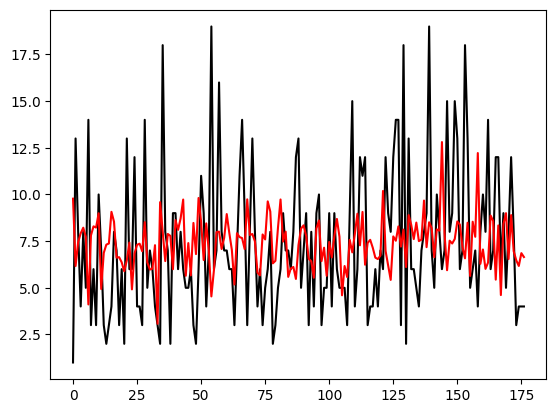

In [17]:
plt.plot(y_true,'k-')
plt.plot(y_pred,'r-')

In [18]:
data = data[data['LOS'] < 20]

In [19]:
data

,Age,Sex,BMI,G0,G1,G2,G3,G4,G5,G6,G7,G8,G9,Side,predmort,LOS,LOSbin
0,66.0,1.0,26.0,7.4,39.0,9.8,31.0,8.0,15.0,30.0,175.0,57.0,1.56,0.0,1.42,1.0,0.0
1,68.0,1.0,24.0,15.3,29.0,24.8,79.0,17.0,16.0,111.0,177.0,80.0,2.97,0.0,1.00,13.0,1.0
2,77.0,0.0,25.0,8.2,47.0,9.2,47.0,7.0,9.0,117.0,76.0,71.0,1.17,1.0,3.00,8.0,1.0
3,81.0,0.0,24.0,7.5,24.0,15.5,87.0,7.0,8.0,59.0,57.0,80.0,1.70,0.0,2.00,4.0,0.0
4,69.0,0.0,34.0,6.5,32.0,11.4,77.0,8.0,9.0,59.0,65.0,63.0,1.65,0.0,1.00,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,70.0,0.0,23.0,9.5,32.0,18.5,80.0,8.0,10.0,79.0,95.0,65.0,1.75,0.0,3.00,8.0,1.0
244,55.0,1.0,31.0,7.1,23.0,20.7,80.0,13.0,16.0,188.0,183.0,71.0,3.07,0.0,1.00,3.0,0.0
246,74.0,0.0,22.0,12.2,36.0,17.4,78.0,7.0,9.0,61.0,80.0,66.0,3.03,0.0,0.50,4.0,0.0
247,66.0,1.0,33.0,19.8,30.0,19.8,92.0,15.0,14.0,122.0,140.0,82.0,2.69,0.0,1.00,4.0,0.0


In [7]:
X_value = data[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
y_value = data[['LOS']]
X_value.shape
X1 = np.array(X_value)
y1 = np.array(y_value)

In [21]:
y_true,y_pred = regression_model(model,X1,y1)
y_true = y_true.reshape(-1)
y_pred = y_pred.reshape(-1)
r2_score(y_true,y_pred)

-0.11870680848829185

In [22]:
def plot_graph(MAE,MSE,Median,sd,r2):
    x_data = ('MAE','MSE','Median AE','s.d','R2 score')
    y_data = [MAE,MSE,Median,sd,r2]
    color = 'coral'
    bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
    plt.bar_label(bar, label_type='edge')
    plt.show()
    plt.close()

In [9]:
def regression_model(model,X,y):
#     lg = model(alpha = n)
    lg = model
    y = np.array(y)
    X1 = np.array(X)
    pred = []
    y_true = []
    loo = LeaveOneOut()
    
    for train_index, test_index in loo.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_test = np.array(y_test)
        y_train = np.array(y_train)

        lg.fit(X_train,y_train)

        predict_data = lg.predict(X_test)
        pred.append(predict_data)
        y_true.append(y_test)

    y_new = np.array(y_true).reshape(-1)
    pred_new = np.array(pred).reshape(-1)
    RMSE = mean_squared_error(y_new,pred_new,squared=False)
    MAE = mean_absolute_error(y_new,pred_new)
    MSE = mean_squared_error(y_new,pred_new)
    Median = median_absolute_error(y_new,pred_new)
    SD = np.std(pred_new)
    r2 = r2_score(y_new,pred_new)
    return r2,MAE,MSE,Median,SD,RMSE

In [24]:
reg = linear_model.RidgeCV(alphas=np.arange(0.1,1.0,0.01), scoring='r2')
reg.fit(X1,y1)
print(reg.alpha_)

0.9899999999999995


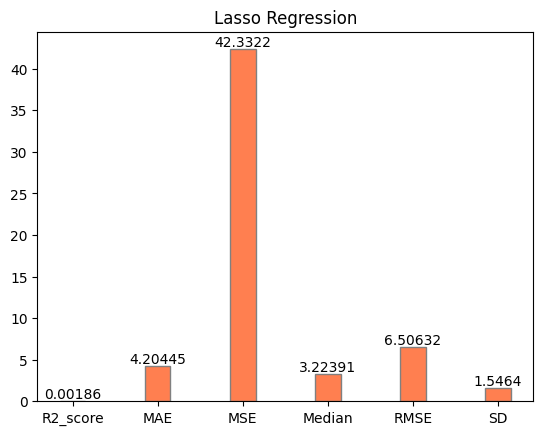

In [19]:
model = Lasso(alpha=0.7799999999999997)
r2_ridge,MAE,MSE,Median,SD,RMSE = regression_model(model,X1,y1)
x_data = ('R2_score','MAE','MSE','Median','RMSE','SD')
y_data = [np.round(r2_ridge,5),MAE,MSE,Median,RMSE,SD]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Lasso Regression")
plt.show()
plt.close()

In [26]:
alphas = np.arange(0, 1.0, 0.01)
loo = LeaveOneOut()
plt.figure(figsize=(5, 3))
for model in [Ridge]:
    scores = [regression_model_r2(model,X1,y1,alpha) for alpha in alphas]
    plt.plot(alphas,scores)
plt.title("alpha between 0.1~1.0")
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.tight_layout()
plt.show()

NameError: name 'regression_model_r2' is not defined

<Figure size 500x300 with 0 Axes>

In [ ]:
alphas = np.arange(0.1, 1.0, 0.01)
loo = LeaveOneOut()
plt.figure(figsize=(5, 3))
for model in [Lasso]:
    scores = [regression_model_r2(model,X1,y1,alpha) for alpha in alphas]
    plt.plot(alphas,scores)
plt.title("alpha between 0.1~1.0")
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.tight_layout()
plt.show()

In [ ]:
reg = linear_model.LassoCV(alphas=np.arange(0.1,1.0,0.01),cv=loo)
reg.fit(X1,y1)
alpha_lasso = (reg.alpha_)
print(alpha_lasso)

In [ ]:
model = Lasso
r2_ridge,MAE,MSE,Median,SD,RMSE = regression_model(model,X1,y1,0.7799999999999997)
alpha_lasso = (reg.alpha_)
x_data = ('Alpha','R2_score','MAE','MSE','Median','RMSE','SD')
y_data = [alpha_lasso,r2_ridge,MAE,MSE,Median,RMSE,SD]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Best R2_score with alpha value")
plt.show()
plt.close()

In [ ]:
alphas = np.arange(0.1, 1.0, 0.01)
loo = LeaveOneOut()
plt.figure(figsize=(5, 3))
for model in [ElasticNet]:
    scores = [regression_model_r2(model,X1,y1,alpha) for alpha in alphas]
    plt.plot(alphas,scores)
plt.title("alpha between 0.1~1.0")
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.tight_layout()
plt.show()

In [ ]:
reg = linear_model.ElasticNetCV(alphas=np.arange(0.1,1.0,0.01),cv=loo)
reg.fit(X1,y1)
alpha_els = (reg.alpha_)
print(alpha_els)

In [ ]:
model = ElasticNet
r2_ridge,MAE,MSE,Median,SD,RMSE = regression_model(model,X1,y1,0.9899999999999995)
alpha_els = (reg.alpha_)
x_data = ('Alpha','R2_score','MAE','MSE','Median','RMSE','SD')
y_data = [alpha_els,r2_ridge,MAE,MSE,Median,RMSE,SD]
color = 'coral'
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Best R2_score with alpha value")
plt.show()
plt.close()

In [27]:
X_value = data[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
y_value = data[['LOS']]
X_value.shape
X1 = np.array(X_value)
y1 = np.array(y_value)

In [28]:
def regression_model_compare(model,X,y,n):
    lg = model(alpha = n)
    y = np.array(y)
    X1 = np.array(X)
    pred = []
    y_true = []
    loo = LeaveOneOut()
    
    for train_index, test_index in loo.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_test = np.array(y_test)
        y_train = np.array(y_train)

        lg.fit(X_train,y_train)

        predict_data = lg.predict(X_test)
        pred.append(predict_data)
        y_true.append(y_test)

    y_new = np.array(y_true).reshape(-1)
    pred_new = np.array(pred).reshape(-1)
    RMSE = mean_squared_error(y_new,pred_new,squared=False)
    MAE = mean_absolute_error(y_new,pred_new)
    MSE = mean_squared_error(y_new,pred_new)
    Median = median_absolute_error(y_new,pred_new)
    SD = np.std(pred_new)
    r2 = r2_score(y_new,pred_new)
    return y_new,pred_new

In [29]:
model = Lasso
true_v, pred_v = regression_model_compare(model,X1,y1,0.7799999999999997)

In [30]:
#bins at 7
true_array = []
for i in true_v:
    if i <= 7 :
        true_array.append(0)
    else:
        true_array.append(1)

In [31]:
pred_array = []
for i in pred_v:
    if i > 7 :
        pred_array.append(1)
    else:
        pred_array.append(0)

In [32]:
accuracy = np.sum(np.array(true_array).reshape(-1) == np.array(pred_array).reshape(-1))/len(true_array)

In [33]:
accuracy

0.536723163841808

In [34]:
def ret_accuracy(bins,true_v,pred_v):
    true_array = []
    for i in true_v:
        if i <= bins :
            true_array.append(0)
        else:
            true_array.append(1)
    pred_array = []
    for i in pred_v:
        if i > bins :
            pred_array.append(1)
        else:
            pred_array.append(0)
    return np.sum(np.array(true_array).reshape(-1) == np.array(pred_array).reshape(-1))/len(true_array)

In [35]:
ret_accuracy(8,true_v,pred_v)

0.6271186440677966

In [ ]:
def graph_acc(n,true_v,pred_v):
    acc = []
    for i in range(7,n):
        acc.append(ret_accuracy(i,true_v,pred_v))
    x_data = ('Bins=7','Bins=8','Bins=9','Bins=10','Bins=11','Bins=12','Bins=13')
    y_data = acc
    color = 'coral'
    bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
    plt.bar_label(bar, label_type='edge')
    plt.title("Accuracy of the classification")
    plt.show()
    plt.close()    

In [ ]:
graph_acc(14,true_v,pred_v)

In [41]:
pred_v

array([ 8.50438581,  6.03060137,  7.10387589,  7.76226561,  8.23982145,
        7.34126159,  5.3082755 ,  8.10211672,  7.93858152,  7.94296114,
        8.40552542,  5.19038424,  5.95846716,  7.1127748 ,  6.87377229,
        7.59990916,  8.24362415,  7.02518207,  6.50223963,  6.69240675,
        5.73092198,  7.67391989,  7.93730879,  5.60700516,  7.51089617,
        7.92466699,  7.81578343,  7.88024198,  8.20004998,  5.64392386,
        7.08131451,  6.20800036,  7.60575241,  4.97599395,  8.55544598,
        7.65382581,  7.06415333,  7.89813684,  7.82382867,  7.15115853,
        7.62166977,  7.94200657,  8.51043488,  8.48165759,  6.66122345,
        7.60066055,  5.72154734,  8.16946042,  7.26537961,  8.69243461,
        8.32381684,  6.71879248,  8.07072859,  6.36737053,  7.05172453,
        6.99014944,  7.96892963,  8.0007191 ,  7.34952242,  7.88102628,
        8.71630486,  7.56173677,  7.3322101 ,  5.99826141,  7.73076226,
        7.00141267,  7.22083729,  7.0594467 ,  7.93951642,  8.08

In [42]:
prev_l7 = pred_v[pred_v > 7]

In [44]:
prev_l7.shape

(125,)

In [45]:
true_l7 = true_v[true_v > 7]

In [46]:
true_l7.shape

(71,)

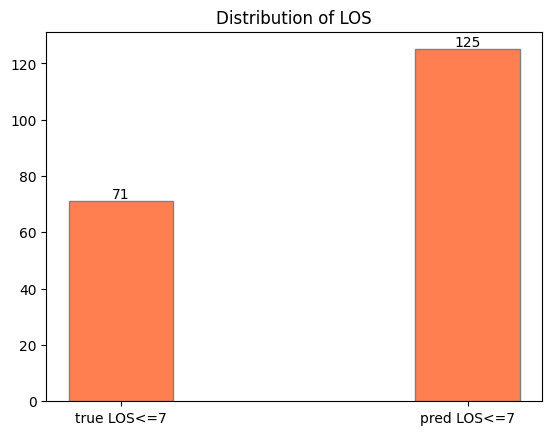

In [47]:
x_data = ('true LOS<=7', 'pred LOS<=7')
y_data = [71,125]
bar = plt.bar(x_data,y_data,0.3,color=color,edgecolor ='grey')
plt.bar_label(bar, label_type='edge')
plt.title("Distribution of LOS")
plt.show()
plt.close()    